#### Regression in Python

Regression is when you are given a line and you need to figure out what is the equation underpinning it.
This video presents regression from the point of view of doing exact calculations, statistical POV. (Machine learning will come later)

In [1]:
# Numerical arrays
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

In [2]:
# Plots styles.
plt.style.use('ggplot')

# Plot size.
plt.rcParams['figure.figsize'] = (14, 10)

In [3]:
# Create two arrays for the points.
x = np.array([4.0, 16.0])
y = np.array([6.0, 12.0])
x, y

(array([ 4., 16.]), array([ 6., 12.]))

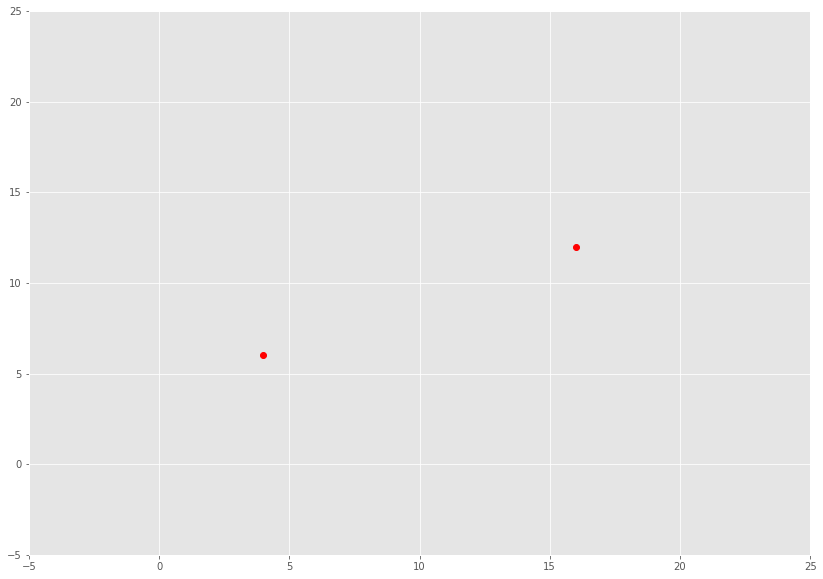

In [4]:
# Plot the points.
plt.plot(x, y, 'ro')

# Give ourselves some space.
plt.xlim([-5.0, 25.0])
plt.ylim([-5.0, 25.0]);

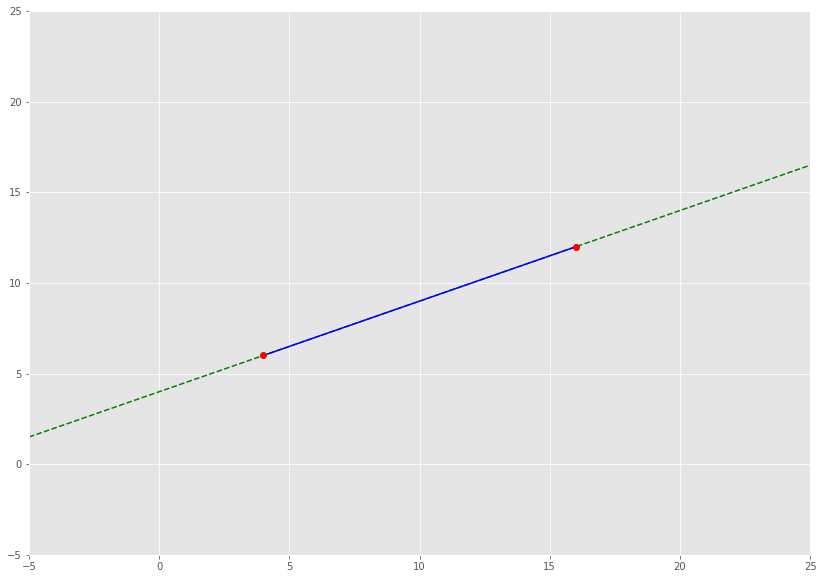

In [5]:
# Plot a straight line.
l = np.linspace(-5.0, 25.0, 100)
plt.plot(l, 0.5 * l + 4.0, 'g--')

# Plot a straight line segment.
l = np.linspace(4.0, 16.0, 10)
plt.plot(l, 0.5 * l + 4.0, 'b-')

# Plot the points.
plt.plot(x, y, 'ro')

# Give ourselves some space.
plt.xlim([-5.0, 25.0])
plt.ylim([-5.0, 25.0]);
#pyplot automatically does regression in the background

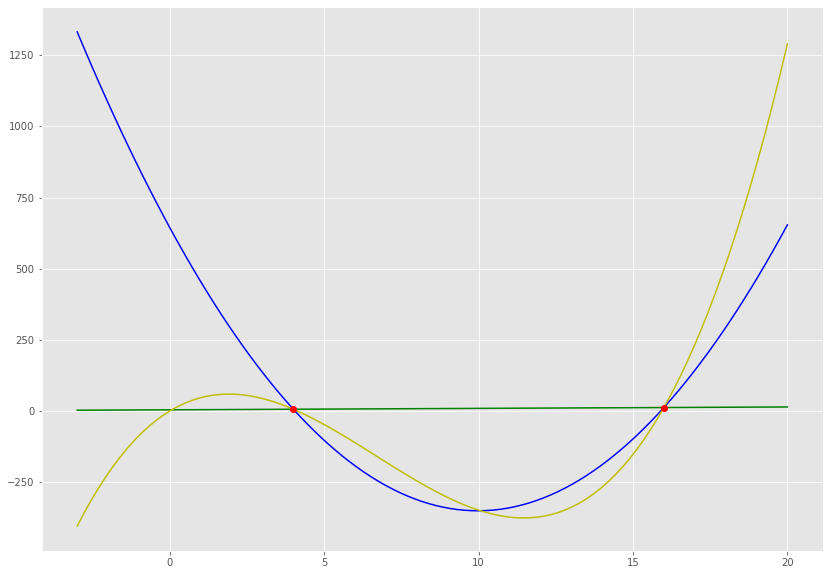

In [6]:
# Plot a straight line.
l = np.linspace(-3.0, 20.0, 100)
plt.plot(l, 0.5 * l + 4.0, 'g-')

# Plot a parabola.
plt.plot(l, 10.0 * (l**2) - 199.5 * l + 644.0, 'b-')

# Plot a cubic.
plt.plot(l, (l**3)  - 20.0625 * l**2  + 65.75 * l, 'y-')

# Plot the points.
plt.plot(x, y, 'ro');
#The plot looks very different to the one above even though the points are the same.
#That is because the y axis has been modified to produce the additional shapes
#This can be used to colour the interpretation of data by the human eye

### Lines

$y=5x+2$

In [7]:
# Set up some x values.
x = np.linspace(0.0, 10.0, 1000)


In [8]:
# Create y - note numpy's element-wise operations.
y = 5.0 * x + 2.0

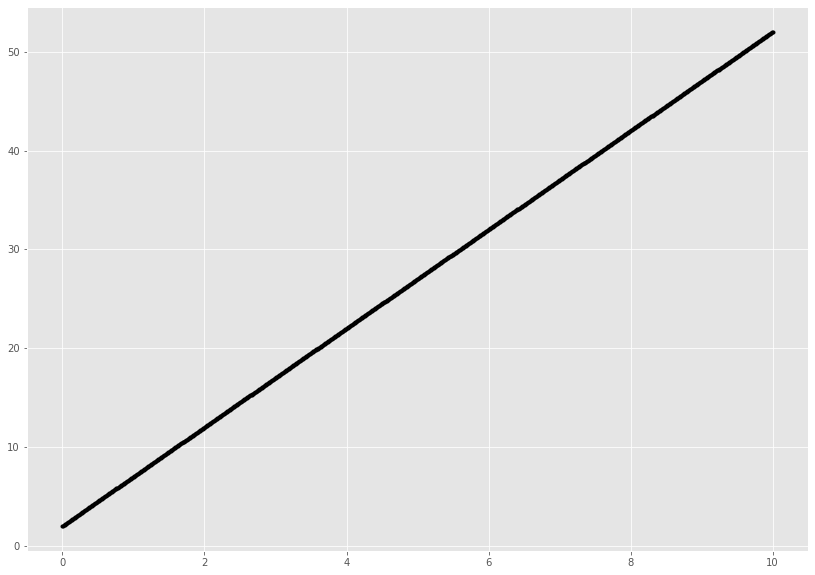

In [9]:
# Plot x versus y.
#so many points it looks like a straight line
plt.plot(x, y, 'k.')

In [13]:
# Do regression on the x and y arrays using numpy.
#polynomial?
#1= highest power of x
#Numpy polyfit() method is used to fit our data inside a polynomial function. 
#It least squares the polynomial fit. 
#It fits a polynomial p(X) of degree deg to points (X, Y). 
#This method returns a vector of coefficients p that minimizes the squared error in the order deg, deg-1, … 0.
np.polyfit(x, y, 1)
#the answer shows that poly fit has figured out the relationship, which was rigged to  be $y=5x+2$
#not very interesting because all the points were on the same line

array([5., 2.])

--------------------------------------------

$y=3x-1+\alpha $

In [28]:
# Create a y with noise.
#with this part of the code "+ np.random.normal(0.0, 1.0, len(x))"
#noise centred around zero, standard deviation of 1
#x and y were define above
y = 3.0 * x - 1.0 + np.random.normal(0.0, 1.0, len(x))

In [15]:
# Look at y.
#y

In [22]:
# Do regression on the x and y arrays using numpy.
np.polyfit(x, y, 1)
#array([ 3.00061773, -1.00234222])

array([ 2.94854771, -0.66284875])

In [26]:
# Create variables with those values.
m, c = np.polyfit(x, y, 1)
# Have a look at m and c.
m, c

(2.9920967728070322, -0.9533205725325029)

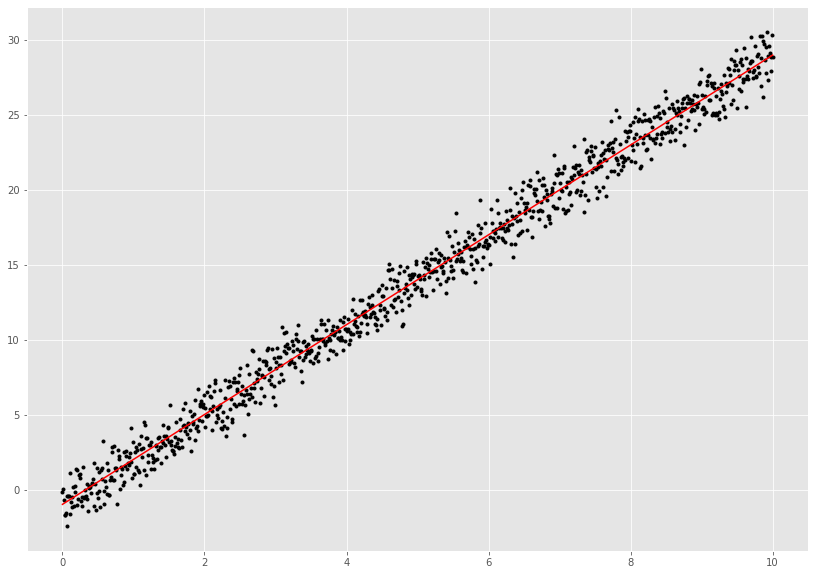

In [29]:
# Plot x and y and the regression line in red.
plt.plot(x, y, 'k.')
plt.plot(x, m * x + c, 'r-')#multiply x by m and c defined above
#add more noise if you like at this point np.random.normal(0.0, 1.0, len(x)) make 1 bigger the stdev

In [ ]:
# Calculate mean x and mean y.
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract mean/avg from x and y.
x_zero = x - x_avg
y_zero = y - y_avg

# Dot product of mean-adjusted x and y divided by dot product of mean adjusted x with itself.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
# Subtract m times average x from average y.
c = y_avg - m * x_avg

# Let's have a look - same values as above.
m, c

In [ ]:
# Create y from a polynomial in x.
y =  2.0 * x * x + 5.0 * x + 1.0 + np.random.normal(0.0, 1.0, len(x))

In [ ]:
# Look at y.
y

In [ ]:
# Blindly try the regression - we get answers.
# Create variables with those values.
m, c = np.polyfit(x, y, 1)
# Have a look at m and c.
m, c

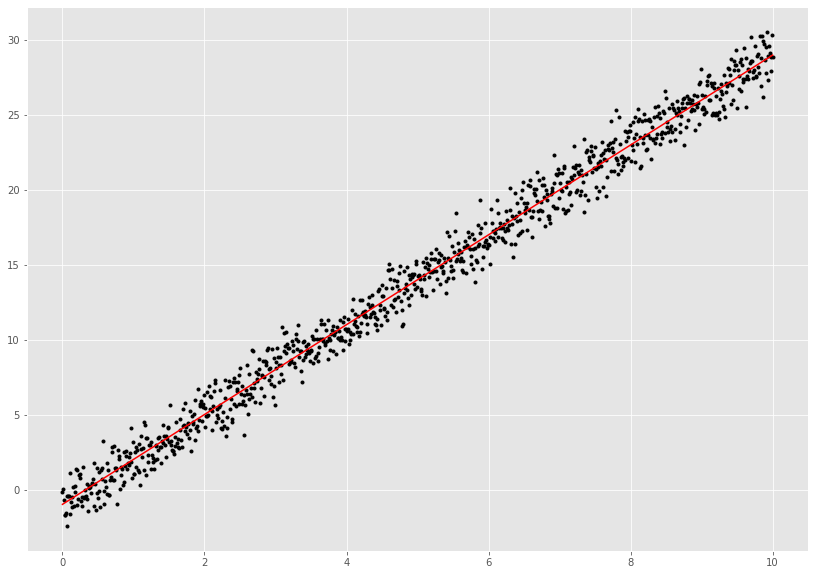

In [30]:
# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, m * x + c, 'r-')

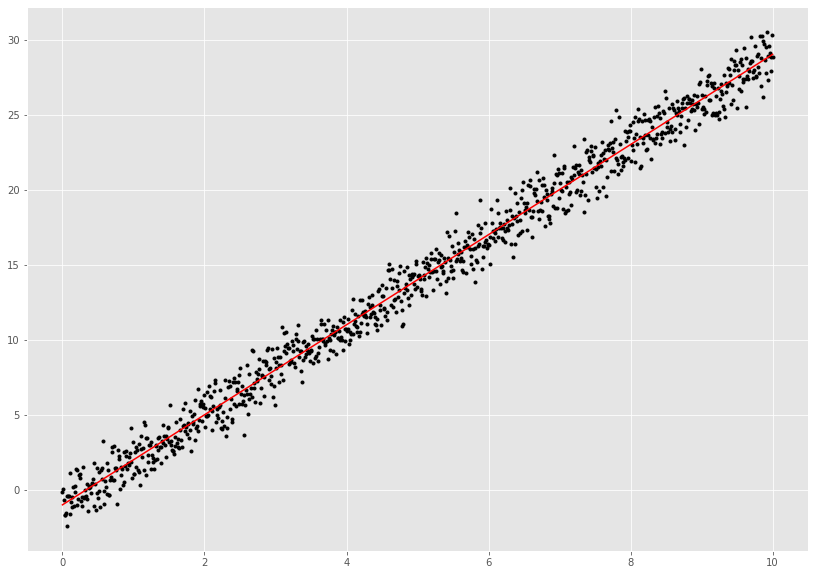

In [31]:
a, b, c = np.polyfit(x, y, 2)

# Plot the line and the points.
# Note how the points below the line are bunched in a specific $x$ range.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x + b * x + c, 'r-')

### Multiple linear regression¶
Let's try multiple linear regression using sklearn. https://scikit-learn.org/stable/
You can't visualise so many variables (the 4 of the iris data set) on plots, that is the down side.
SciKit learn can be used instead to produce results
They must be interpreted in another way other than visually e.g. testing the "score"
The calculations are set out in this little section to calculate the score "by hand".
Back to Ian's earlier point that the calculations are not difficult when we use these wonderful python packages.
Knowing which one to use is tricksy!<br>
that is - what regression is most appropriate?

In [33]:
# Import linear_model from sklearn.
import sklearn.linear_model as lm

In [34]:
# Create a linear regression model instance.
m = lm.LinearRegression()

In [35]:
# Let's use pandas to read a csv file and organise our data.
import pandas as pd

In [41]:
# Read the iris csv from online.
df = pd.read_csv('https://datahub.io/machine-learning/iris/r/iris.csv')
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


$petalwidth = t(sepallength)+u(sepalwidth)+v(petallength)+c$

In [37]:
# Let's pretend we want to do linear regression on these variables to predict petal width.
x = df[['sepallength', 'sepalwidth', 'petallength']]

In [38]:
# Here's petal width.
y = df['petalwidth']

In [40]:
# Ask our model to fit the data.
m.fit(x, y)


LinearRegression()

In [42]:
# Here's our intercept.
m.intercept_

-0.24872358602445366

In [ ]:
# Here's our coefficients, in order.
m.coef_

In [ ]:
# See how good our fit is.
m.score(x, y)

In [ ]:
# Calculating the score by hand.
t, u, v = m.coef_
c = m.intercept_

y_avg = y.mean()

u = ((y - (t * x['sepallength'] + u * x['sepalwidth'] + v * x['petallength'] + c))**2).sum()
v = ((y - y.mean())**2).sum()

1 - (u/v)

In [ ]:
#### Using statsmodels
To produce the same results about the iris dataset in a nice table!

In [43]:
# Using statsmodels.
import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(x)

# Create a model.
msm = sm.OLS(y, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:             petalwidth   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     736.9
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           6.20e-88
Time:                        14:54:51   Log-Likelihood:                 36.809
No. Observations:                 150   AIC:                            -65.62
Df Residuals:                     146   BIC:                            -53.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2487      0.178     -1.396      